In [1]:
import sklearn
import numpy as np
import os
import pandas as pd
import cv2

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [41]:
x_train = pd.read_csv("x_train_all.csv")
data_train = pd.read_csv("y_train_all.csv")

X = x_train.to_numpy()
Y = y_train.to_numpy()

data = x_train.astype('float') / 255

data_sm = np.apply_along_axis(
    func1d=lambda item: cv2.resize(item.reshape(48, 48), dsize=(30, 30)),
    axis=1, arr=data).reshape(-1, 30*30)

In [3]:
# Import the K-means algorithm
from sklearn.cluster import KMeans

In [4]:
# Set K as 10 since we have 10 classes
k = 10 
# Create the algorithm and fit the data
kmeans = KMeans(n_clusters=k, random_state=42, n_init=35)
kmeans.fit(data_sm)

KMeans(n_clusters=10, n_init=35, random_state=42)

In [5]:
# Print the Inertia to measure the model performance
kmeans.inertia_

209957.84840460177

In [26]:
kmeans_labels = kmeans.labels_
unique_labels = np.unique(kmeans_labels)
label_count = len(unique_labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
# Group the indecies of each label into a 2D matrix
cluster_indecies = [[] for i in range(label_count)]

# Loop through the labeled data and group the indecies
for i, label in enumerate(kmeans_labels,0):
    for n in range(label_count):
        if label == n:
            cluster_indecies[n].append(i)
        else:
            continue

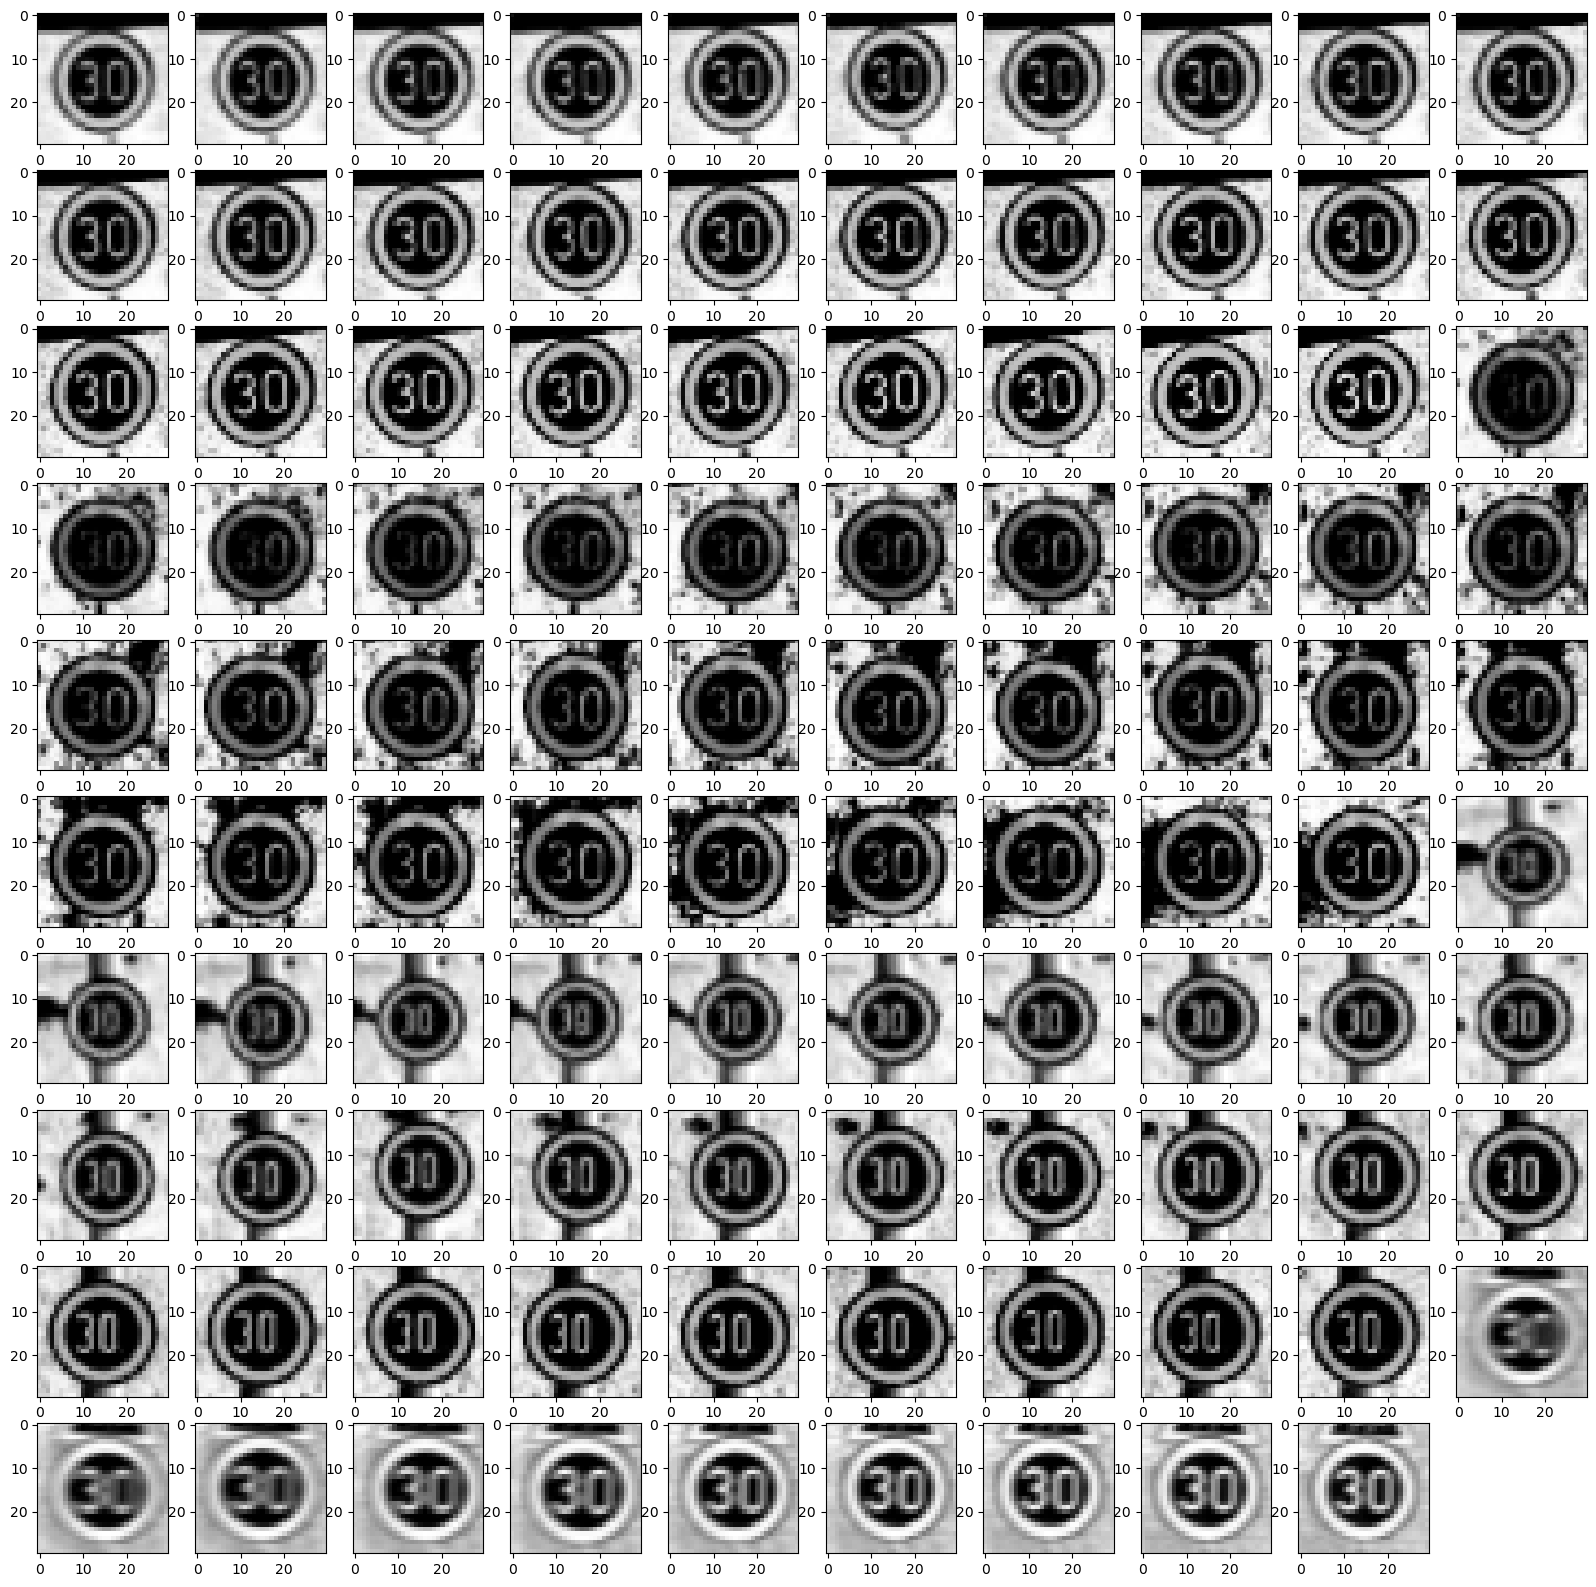

In [29]:
# Set the cluster to visualize
cluster_to_plot = 5

plt.figure(figsize=(20,20));

# Plot a 10x10 plot the first 100 records in the cluster
for i in range(1, 100): 
    plt.subplot(10, 10, i);
    plt.imshow(data_sm[cluster_indecies[cluster_to_plot][i]]
               .reshape(30,30), cmap = plt.cm.binary);
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [14]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*data_sm.shape)

In [13]:
n_clusters = 10  # number of regions
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward"
)
ward.fit(data_sm)

AgglomerativeClustering(n_clusters=10)

In [31]:
ward_labels = ward.labels_
unique_labels = np.unique(ward_labels)
label_count = len(unique_labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [32]:
# Group the indecies of each label into a 2D matrix
cluster_indecies = [[] for i in range(label_count)]

# Loop through the labeled data and group the indecies
for i, label in enumerate(ward_labels,0):
    for n in range(label_count):
        if label == n:
            cluster_indecies[n].append(i)
        else:
            continue

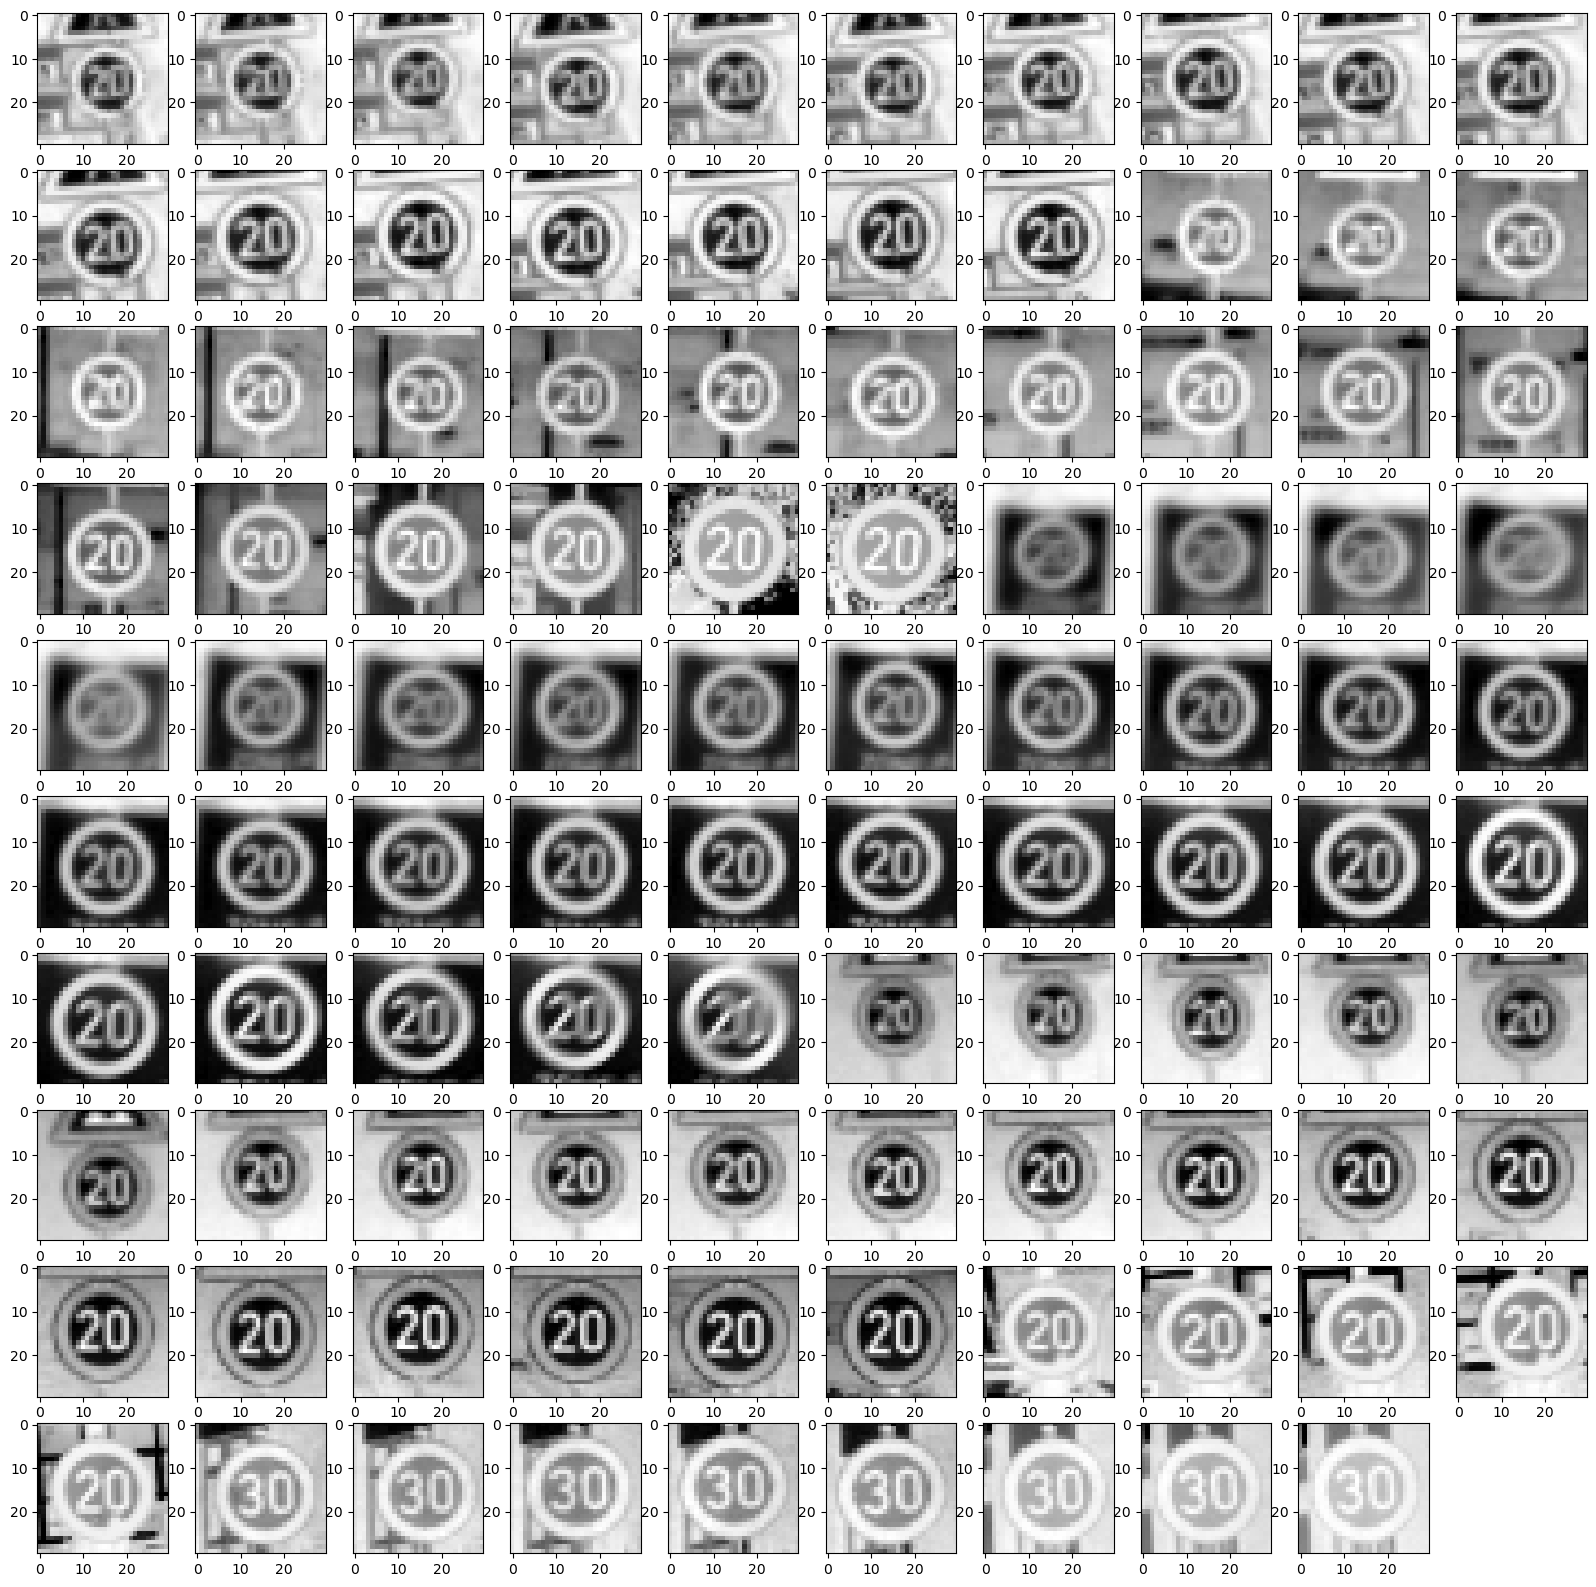

In [33]:
# Set the cluster to visualize
cluster_to_plot = 5

plt.figure(figsize=(20,20));

# Plot a 10x10 plot the first 100 records in the cluster
for i in range(1, 100): 
    plt.subplot(10, 10, i);
    plt.imshow(data_sm[cluster_indecies[cluster_to_plot][i]]
               .reshape(30,30), cmap = plt.cm.binary);
plt.show()

In [42]:
# Splitting the data into Train and Test from traning dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_sm, data_train, test_size = 0.3, random_state = 1)

In [43]:
from sklearn.mixture import GaussianMixture
n_clusters = 10
gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(X_train, y_train)

In [47]:
pred=gm.predict(X_test)
pred

array([7, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
gm.score(y_test, pred)

-2907.046594270959